In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [12]:
wine=pd.read_csv("wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
df=pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df=df.iloc[:,1:]
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df_norm=scale(df.values)
df_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [6]:
pca=PCA(n_components=13)
pca_values=pca.fit_transform(df_norm)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [7]:
var=pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [8]:
var1=np.cumsum(np.round(var,4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

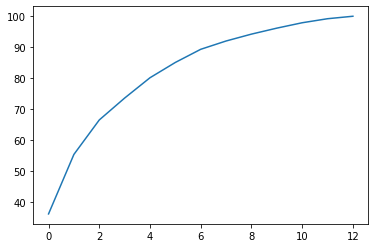

In [9]:
plt.plot(var1)

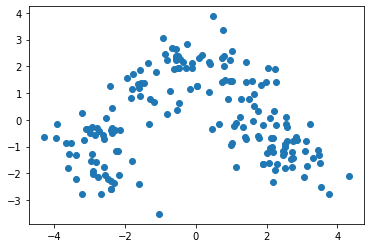

In [54]:
x=pca_values[:,0:1]
y=pca_values[:,1:2]
plt.scatter(x,y)

### K-Means

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'wcss')

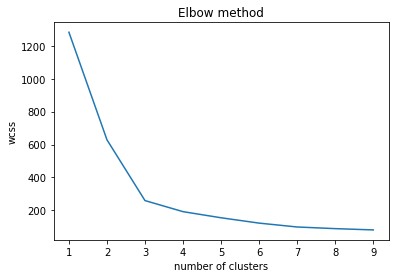

In [38]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_values[:,0:2])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss)
plt.title("Elbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")

In [39]:
clusters=KMeans(n_clusters=3,random_state=0)
clusters.fit(pca_values[:,0:2])

KMeans(n_clusters=3, random_state=0)

In [40]:
clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

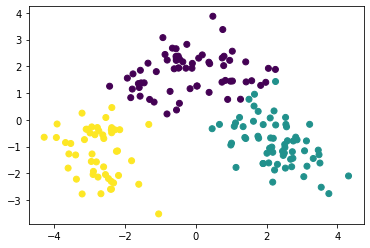

In [55]:
x=pca_values[:,0:1]
y=pca_values[:,1:2]
plt.scatter(x,y,c=clusters.labels_)

In [41]:
df["clusterd"]=clusters.labels_

In [42]:
df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterd,clusterdH
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2,2


In [43]:
clusters.cluster_centers_

array([[-0.16278513,  1.76758824],
       [ 2.26614991, -0.86559213],
       [-2.74392982, -1.2141906 ]])

In [44]:
df.clusterd.value_counts()

0    65
1    64
2    49
Name: clusterd, dtype: int64

In [45]:
df.groupby("clusterd").mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterdH
clusterd,,,,,,,,,,,,,,
0,12.238308,1.931385,2.219385,19.898462,92.830769,2.204308,1.989231,0.365538,1.587692,2.992615,1.051631,2.769231,506.353846,0.769231
1,13.659219,1.975781,2.463750,17.596875,107.312500,2.859688,3.012656,0.290000,1.921719,5.406250,1.069688,3.157188,1082.562500,0.187500
2,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020,2.000000


### Hierarchical

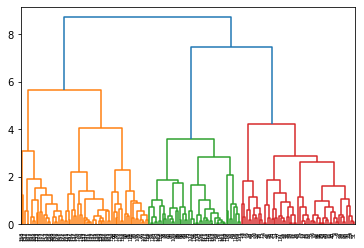

In [46]:
dendrogram=sch.dendrogram(sch.linkage(pca_values[:,0:2],method="complete"))

In [47]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [48]:
y_hc = hc.fit_predict(pca_values[:,0:2])
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

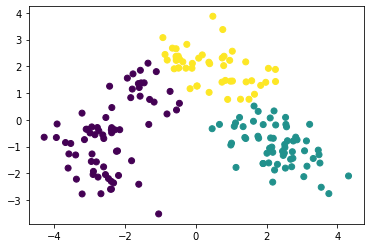

In [56]:
x=pca_values[:,0:1]
y=pca_values[:,1:2]
plt.scatter(x,y,c=y_hc)

In [49]:
df['clusterdH']=y_hc
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterd,clusterdH
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1


In [50]:
df.clusterdH.value_counts()

0    68
1    61
2    49
Name: clusterdH, dtype: int64

In [51]:
df.groupby("clusterdH").mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterd
clusterdH,,,,,,,,,,,,,,
0,12.934559,3.081765,2.416324,21.264706,97.750000,1.720588,1.023824,0.455735,1.197647,6.165882,0.762147,1.892500,599.632353,1.441176
1,13.686721,2.006066,2.472295,17.495082,108.131148,2.854918,3.009180,0.292295,1.931148,5.482295,1.063607,3.171148,1101.540984,1.000000
2,12.238163,1.713061,2.165714,19.528571,92.061224,2.395510,2.204694,0.318163,1.713061,2.992653,1.096327,2.913265,509.755102,0.061224
